<p style="text-align:center">
    <a href="https://skills.network" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>


# **Scatter Plot**


Estimated time needed: **45** minutes


## Overview

In this lab, you will focus on creating and interpreting scatter plots to visualize relationships between variables and trends in the dataset. The provided dataset will be directly loaded into a pandas DataFrame, and various scatter plot-related visualizations will be created to explore developer trends, compensation, and preferences.



## Objectives


In this lab, you will:

- Create and analyze scatter plots to examine relationships between variables.

- Use scatter plots to identify trends and patterns in the dataset.

- Focus on visualizations centered on scatter plots for better data-driven insights.


## Setup: Working with the Database



**Install and import the required libraries**


In [1]:
!pip install pandas
!pip install matplotlib

import pandas as pd
import matplotlib.pyplot as plt

#### Step 1: Load the dataset


In [2]:
file_path = "https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/n01PQ9pSmiRX6520flujwQ/survey-data.csv"

df = pd.read_csv(file_path)



### Task 1: Exploring Relationships with Scatter Plots



#### 1. Scatter Plot for Age vs. Job Satisfaction



Visualize the relationship between respondents' age (`Age`) and job satisfaction (`JobSatPoints_6`). Use this plot to identify any patterns or trends.




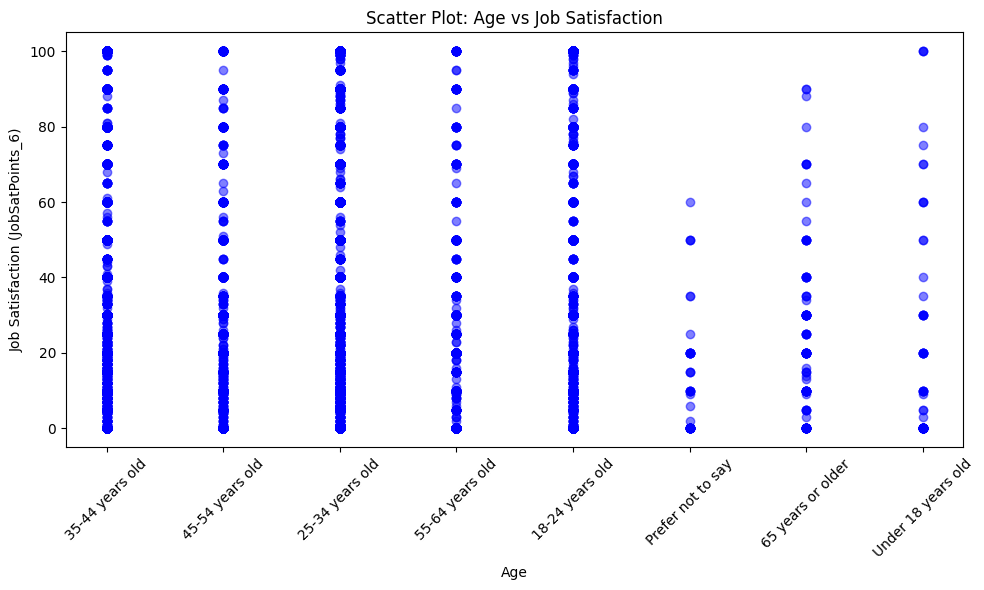

In [4]:
# Ensure data is clean and drop rows with missing values in Age and JobSatPoints_6
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6'])

# Use .loc to safely modify the Age column and convert it to string
df_clean.loc[:, 'Age'] = df_clean['Age'].astype(str)

# Create a scatter plot for Age vs Job Satisfaction
plt.figure(figsize=(10,6))
plt.scatter(df_clean['Age'], df_clean['JobSatPoints_6'], alpha=0.5, color='blue')

# Set labels and title
plt.title('Scatter Plot: Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Compensation vs. Job Satisfaction


Explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`) using a scatter plot.


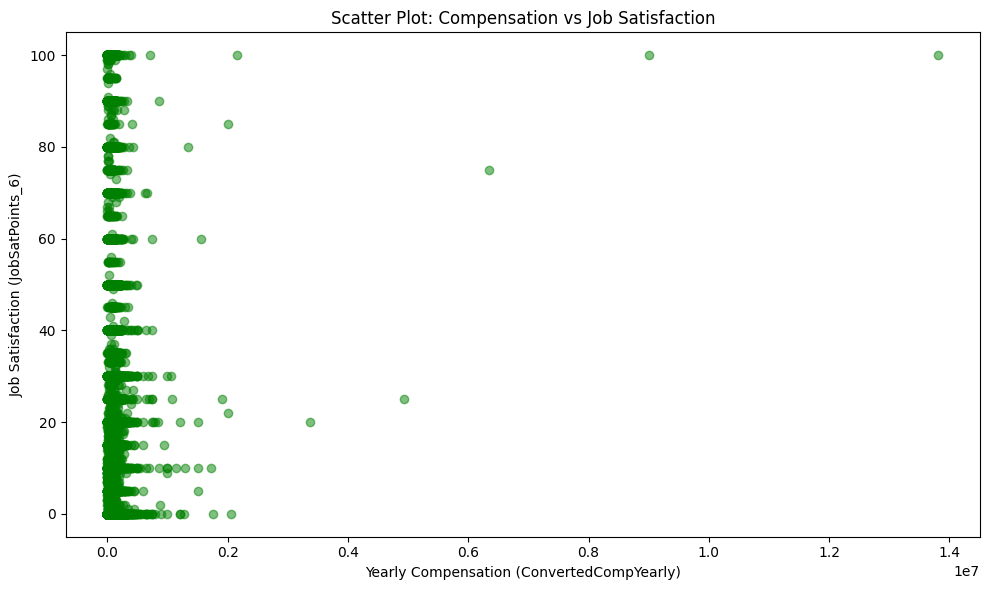

In [5]:
## Write your code here
# Ensure data is clean and drop rows with missing values in ConvertedCompYearly and JobSatPoints_6
df_clean_comp = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# Create a scatter plot for Compensation vs Job Satisfaction
plt.figure(figsize=(10,6))
plt.scatter(df_clean_comp['ConvertedCompYearly'], df_clean_comp['JobSatPoints_6'], alpha=0.5, color='green')

# Set labels and title
plt.title('Scatter Plot: Compensation vs Job Satisfaction')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')

# Show the plot
plt.tight_layout()
plt.show()


### Task 2: Enhancing Scatter Plots


#### 1. Scatter Plot with Trend Line for Age vs. Job Satisfaction



Add a regression line to the scatter plot of Age vs. JobSatPoints_6 to highlight trends in the data.


    Age  JobSatPoints_6
0  17.0             NaN
1  39.0             0.0
2  49.0             NaN
3  21.0             NaN
4  21.0             NaN
Remaining rows after cleaning: 29399


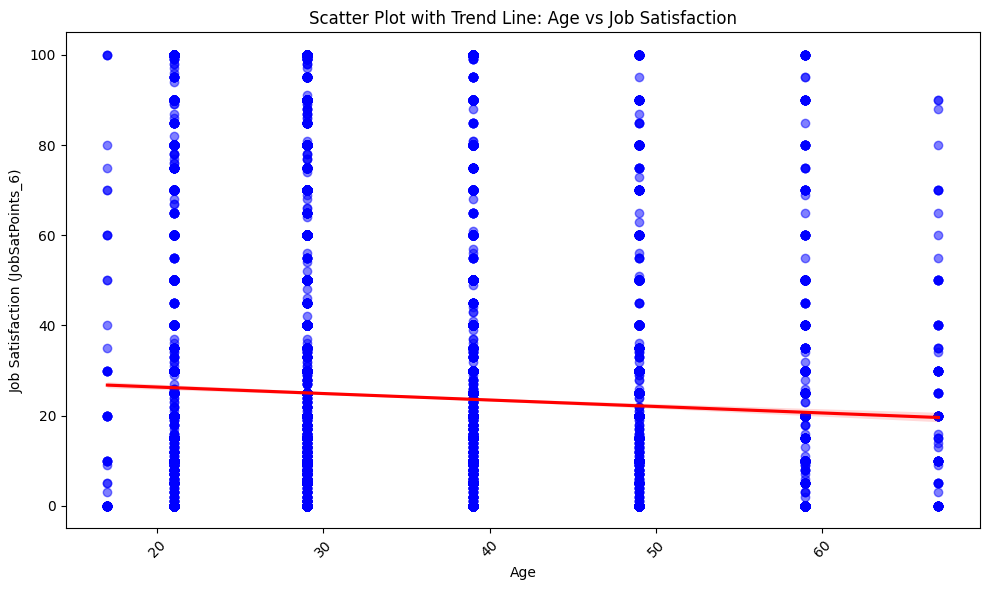

In [25]:
# Install seaborn if not already installed
!pip install seaborn

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Check the first few rows of the dataset to ensure it has valid data for Age and JobSatPoints_6
print(df[['Age', 'JobSatPoints_6']].head())

# Ensure data is clean and drop rows with missing Age and JobSatPoints_6
df_clean = df.dropna(subset=['Age', 'JobSatPoints_6']).copy()

# Convert Age and JobSatPoints_6 to numeric properly
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')
df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')

# Drop rows where conversion caused NaNs (e.g., non-numeric values)
df_clean = df_clean.dropna(subset=['Age', 'JobSatPoints_6'])

# Check if there are still enough data points left after cleaning
print(f"Remaining rows after cleaning: {df_clean.shape[0]}")

# Create a scatter plot with a regression line
plt.figure(figsize=(10,6))

# Create the regression plot
sns.regplot(
    x='Age', 
    y='JobSatPoints_6', 
    data=df_clean, 
    scatter_kws={'alpha':0.5, 'color':'blue'}, 
    line_kws={'color':'red'}
)

# Set labels and title
plt.title('Scatter Plot with Trend Line: Age vs Job Satisfaction')
plt.xlabel('Age')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')

# Rotate x-axis labels for better readability
plt.xticks(rotation=45)

# Show the plot
plt.tight_layout()
plt.show()


#### 2. Scatter Plot for Age vs. Work Experience


Visualize the relationship between Age (`Age`) and Work Experience (`YearsCodePro`) using a scatter plot.


Remaining rows after cleaning: 48590
     Age  YearsCodePro
1   39.0          17.0
2   49.0          27.0
6   39.0           7.0
9   39.0          11.0
11  49.0          25.0


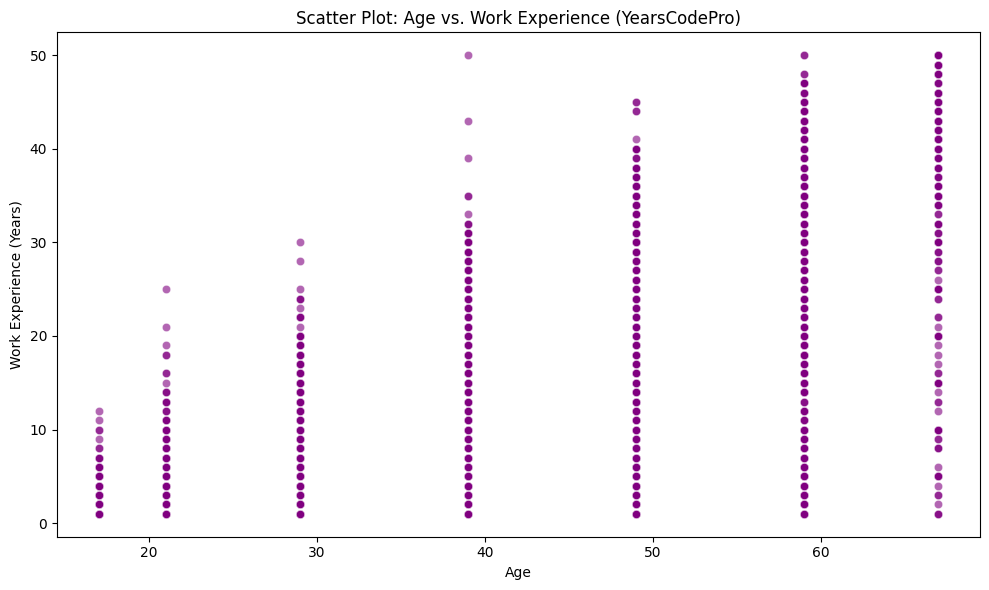

In [26]:
import seaborn as sns  # Ensure seaborn is imported
import matplotlib.pyplot as plt
import pandas as pd

# Ensure the data is clean: drop rows where Age or YearsCodePro are missing
df_clean = df.dropna(subset=['Age', 'YearsCodePro']).copy()

# Convert Age and YearsCodePro to numeric (safely)
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')
df_clean['YearsCodePro'] = pd.to_numeric(df_clean['YearsCodePro'], errors='coerce')

# Drop any rows where conversion caused NaNs
df_clean = df_clean.dropna(subset=['Age', 'YearsCodePro'])

# Debugging step: Check if there are enough rows after cleaning
print(f"Remaining rows after cleaning: {df_clean.shape[0]}")

# Debugging: Check the first few rows of the cleaned data
print(df_clean[['Age', 'YearsCodePro']].head())

# Create scatter plot
plt.figure(figsize=(10,6))
sns.scatterplot(x='Age', y='YearsCodePro', data=df_clean, alpha=0.6, color='purple')

# Set labels and title
plt.title('Scatter Plot: Age vs. Work Experience (YearsCodePro)')
plt.xlabel('Age')
plt.ylabel('Work Experience (Years)')

# Show the plot
plt.tight_layout()
plt.show()


### Task 3: Combining Scatter Plots with Additional Features


#### 1. Bubble Plot of Compensation vs. Job Satisfaction with Age as Bubble Size



Create a bubble plot to explore the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), with bubble size representing age.


Rows remaining after cleaning: 16088
     ConvertedCompYearly  JobSatPoints_6   Age
72                7322.0            65.0  21.0
379              91295.0             0.0  39.0
389             110000.0            20.0  29.0
392             161044.0            30.0  39.0
398             195000.0            30.0  49.0


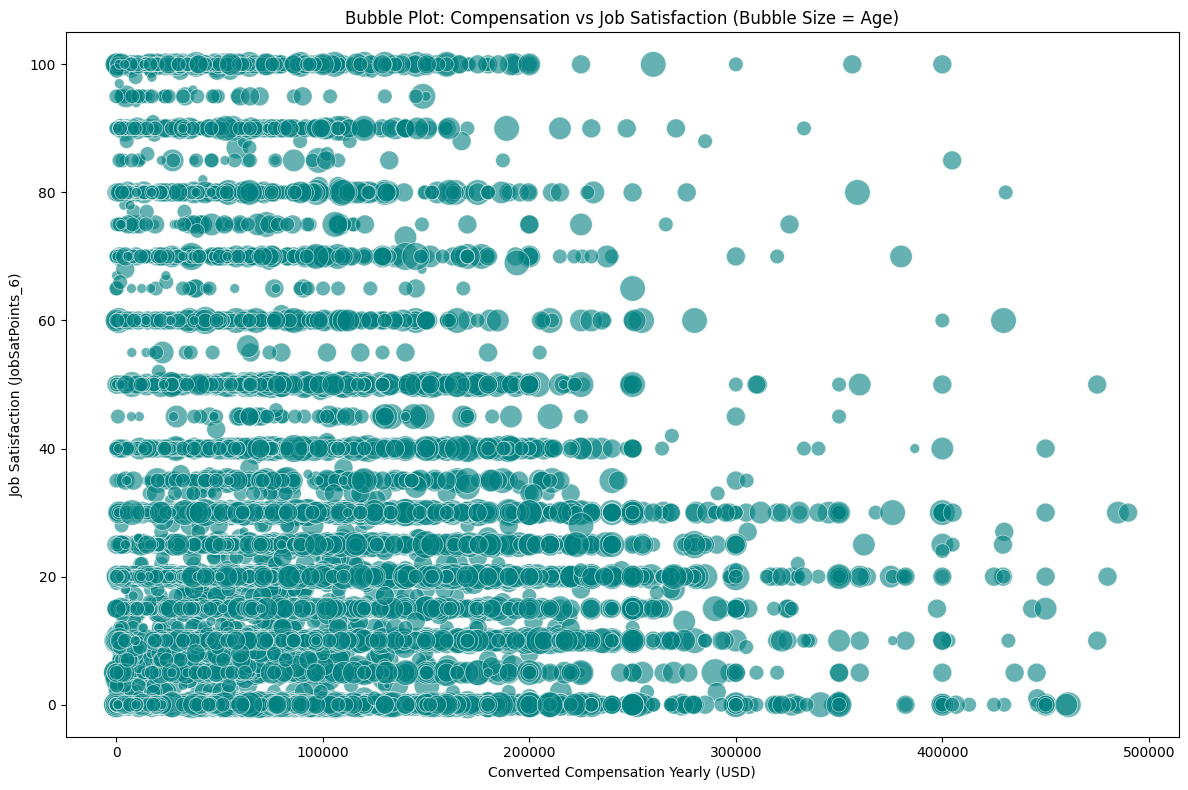

In [27]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Clean the data: drop rows with missing values in relevant columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age']).copy()

# Convert columns to numeric types
df_clean['ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean['JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')
df_clean['Age'] = pd.to_numeric(df_clean['Age'], errors='coerce')

# Drop rows with any NaN values after conversion
df_clean = df_clean.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Age'])

# Limit to reasonable compensation values (optional filtering)
df_clean = df_clean[df_clean['ConvertedCompYearly'] < 500000]  # optional: filter extreme outliers

# Check for minimum data points after cleaning
print(f"Rows remaining after cleaning: {df_clean.shape[0]}")

# Debug: Check first few rows of cleaned data
print(df_clean[['ConvertedCompYearly', 'JobSatPoints_6', 'Age']].head())

# Create bubble plot
plt.figure(figsize=(12,8))
sns.scatterplot(
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    size='Age',  # Bubble size based on Age
    data=df_clean,
    legend=False,
    sizes=(20, 400),  # Adjust the size range of bubbles
    alpha=0.6,
    color='teal'
)

# Set labels and title
plt.title('Bubble Plot: Compensation vs Job Satisfaction (Bubble Size = Age)')
plt.xlabel('Converted Compensation Yearly (USD)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')

# Improve layout
plt.tight_layout()

# Show plot
plt.show()


#### 2. Scatter Plot for Popular Programming Languages by Job Satisfaction


Visualize the popularity of programming languages (`LanguageHaveWorkedWith`) against job satisfaction using a scatter plot. Use points to represent satisfaction levels for each language.


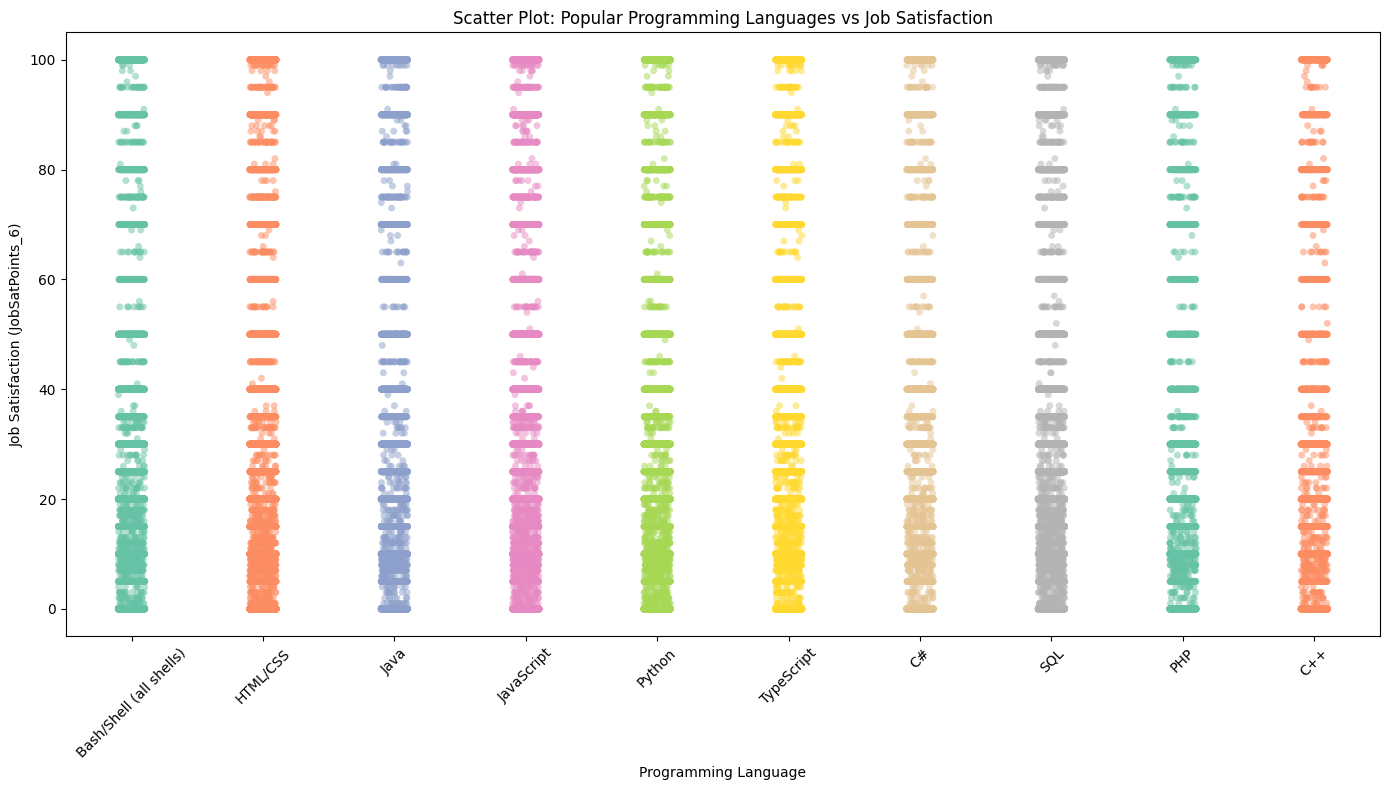

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in LanguageHaveWorkedWith and JobSatPoints_6
df_clean = df.dropna(subset=['LanguageHaveWorkedWith', 'JobSatPoints_6']).copy()

# Split the multiple languages into separate rows
df_exploded = df_clean.assign(LanguageHaveWorkedWith=df_clean['LanguageHaveWorkedWith'].str.split(';')).explode('LanguageHaveWorkedWith')

# Convert JobSatPoints_6 to numeric (if not already)
df_exploded.loc[:, 'JobSatPoints_6'] = pd.to_numeric(df_exploded['JobSatPoints_6'], errors='coerce')

# Drop any rows where JobSatPoints_6 is NaN after conversion
df_exploded = df_exploded.dropna(subset=['JobSatPoints_6'])

# (Optional) Focus on top languages for better visualization
top_languages = df_exploded['LanguageHaveWorkedWith'].value_counts().nlargest(10).index
df_exploded = df_exploded[df_exploded['LanguageHaveWorkedWith'].isin(top_languages)]

# Create the scatter plot using hue correctly
plt.figure(figsize=(14,8))
sns.stripplot(
    data=df_exploded,
    x='LanguageHaveWorkedWith',
    y='JobSatPoints_6',
    hue='LanguageHaveWorkedWith',   # <-- Assign hue properly
    jitter=True,
    alpha=0.5,
    palette='Set2',
    legend=False  # <-- No legend needed since x-axis already shows languages
)

# Set labels and title
plt.title('Scatter Plot: Popular Programming Languages vs Job Satisfaction')
plt.xlabel('Programming Language')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')
plt.xticks(rotation=45)

# Improve layout
plt.tight_layout()

# Show plot
plt.show()


### Task 4: Scatter Plot Comparisons Across Groups


#### 1. Scatter Plot for Compensation vs. Job Satisfaction by Employment Type


Visualize the relationship between yearly compensation (`ConvertedCompYearly`) and job satisfaction (`JobSatPoints_6`), categorized by employment type (`Employment`). Use color coding or markers to differentiate between employment types.


/tmp/ipykernel_1177/1312338132.py:37: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


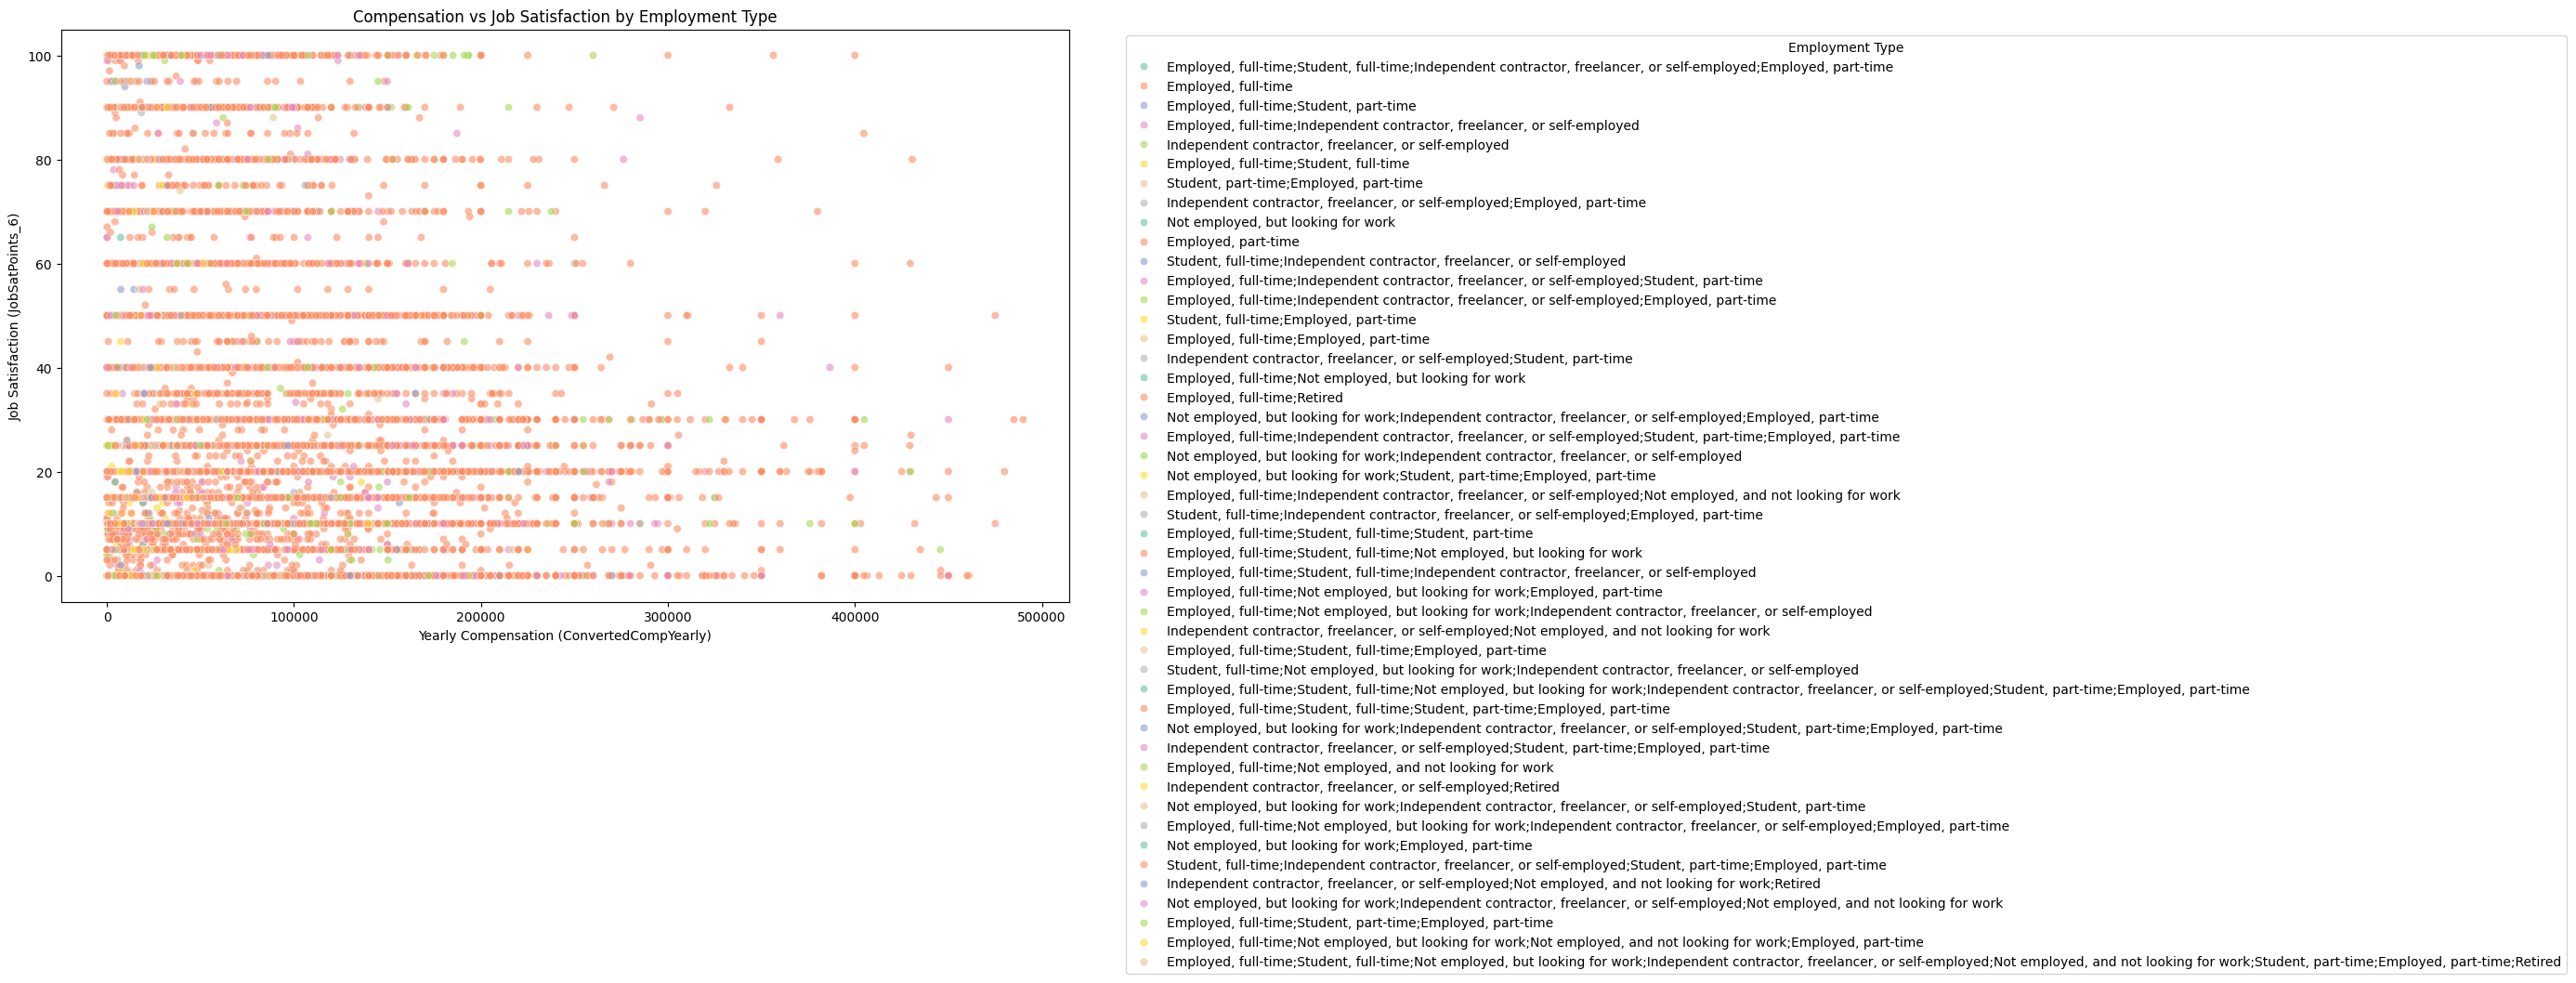

In [16]:
## Write your code here
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Drop rows with missing values in required columns
df_clean = df.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6', 'Employment']).copy()

# Convert relevant columns to numeric if necessary
df_clean.loc[:, 'ConvertedCompYearly'] = pd.to_numeric(df_clean['ConvertedCompYearly'], errors='coerce')
df_clean.loc[:, 'JobSatPoints_6'] = pd.to_numeric(df_clean['JobSatPoints_6'], errors='coerce')

# Drop rows with NaNs created during numeric conversion
df_clean = df_clean.dropna(subset=['ConvertedCompYearly', 'JobSatPoints_6'])

# (Optional) You might want to limit to realistic compensation values to avoid extreme outliers
df_clean = df_clean[df_clean['ConvertedCompYearly'] < 500000]

# Create scatter plot
plt.figure(figsize=(14,8))
sns.scatterplot(
    data=df_clean,
    x='ConvertedCompYearly',
    y='JobSatPoints_6',
    hue='Employment',   # Color-code by Employment type
    alpha=0.6,
    palette='Set2'
)

# Set labels and title
plt.title('Compensation vs Job Satisfaction by Employment Type')
plt.xlabel('Yearly Compensation (ConvertedCompYearly)')
plt.ylabel('Job Satisfaction (JobSatPoints_6)')

# Improve layout
plt.legend(title='Employment Type', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()

# Show plot
plt.show()


#### 2. Scatter Plot for Work Experience vs. Age Group by Country


Compare work experience (`YearsCodePro`) across different age groups (`Age`) and countries (`Country`). Use colors to represent different countries and markers for age groups.


/tmp/ipykernel_1177/211197455.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')
/tmp/ipykernel_1177/211197455.py:62: UserWarning: Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all Axes decorations.
  plt.tight_layout()


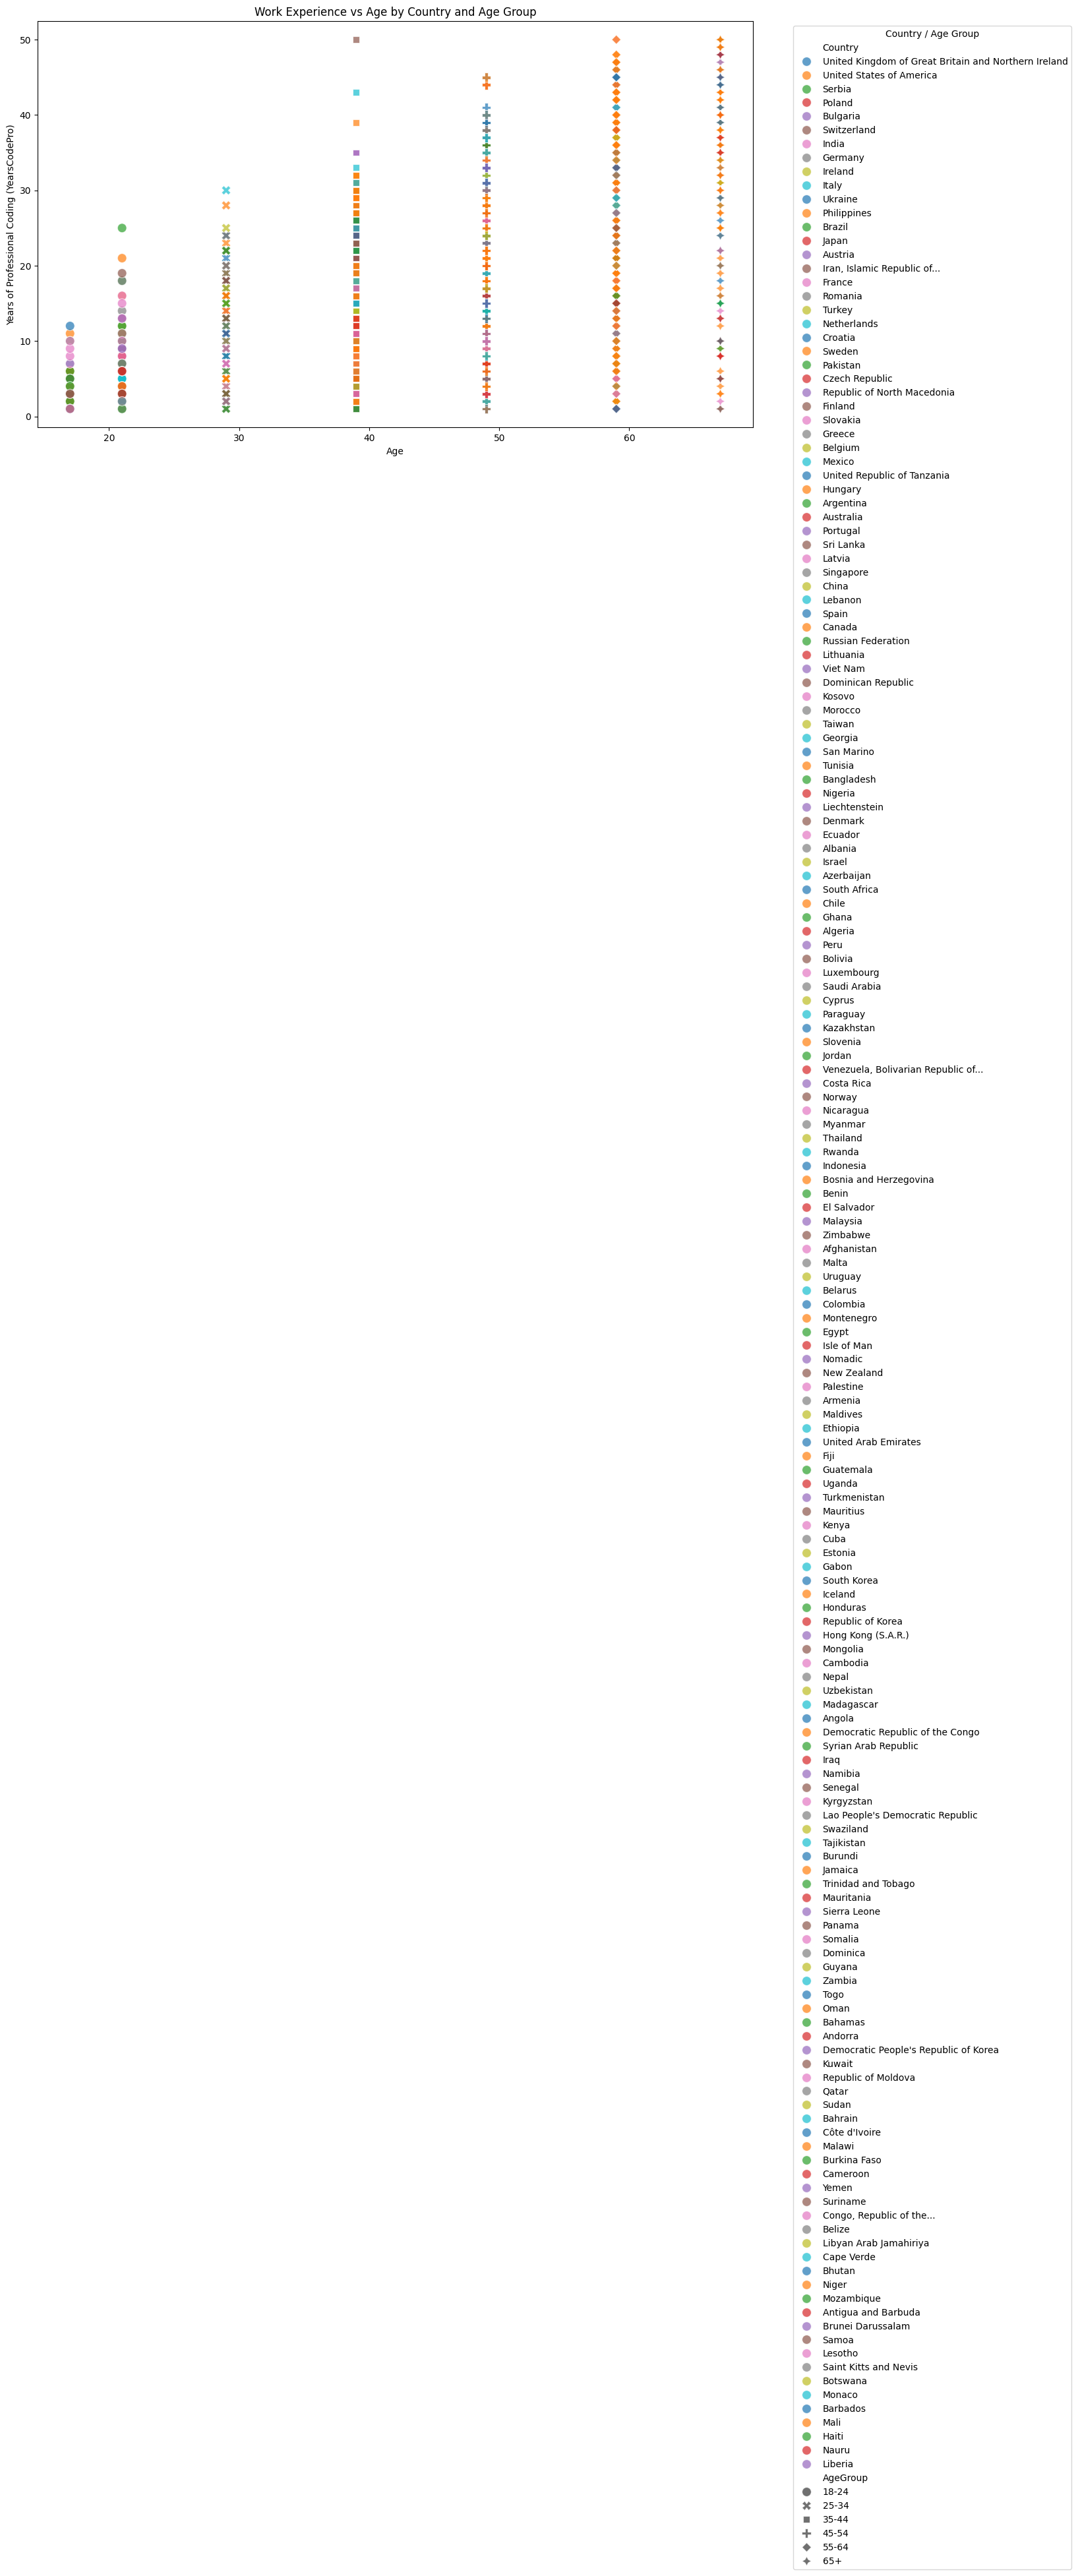

In [24]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming df is already loaded
# Sample age mapping dictionary (for converting age ranges to numeric)
age_mapping = {
    'Under 18 years old': 17,
    '18-24 years old': 21,   # Use the midpoint of the range
    '25-34 years old': 29,
    '35-44 years old': 39,
    '45-54 years old': 49,
    '55-64 years old': 59,
    '65 years or older': 67
}

# Apply the mapping to convert 'Age' to numeric
df['Age'] = df['Age'].map(age_mapping)

# Now, ensure that 'Age' is numeric and drop any rows where 'Age' is NaN (if there are any non-mappable values)
df = df.dropna(subset=['Age'])

# Ensure 'YearsCodePro' is numeric (it might contain non-numeric values, so we handle them)
df['YearsCodePro'] = pd.to_numeric(df['YearsCodePro'], errors='coerce')

# Drop rows with missing values in 'YearsCodePro' and 'Age'
df_clean = df.dropna(subset=['YearsCodePro', 'Age'])

# Ensure the 'Country' column is not missing
df_clean = df_clean.dropna(subset=['Country'])

# Check if there is enough data for plotting
if df_clean.empty:
    print("⚠️ Still no data to plot after processing. Check if Age, YearsCodePro, and Country have enough non-missing values.")
else:
    # Create an 'AgeGroup' column to categorize respondents
    df_clean['AgeGroup'] = pd.cut(df_clean['Age'], bins=[0, 24, 34, 44, 54, 64, 100], 
                                   labels=['18-24', '25-34', '35-44', '45-54', '55-64', '65+'], 
                                   right=False)

    # Create a scatter plot with Age vs YearsCodePro
    plt.figure(figsize=(14,8))
    sns.scatterplot(
        data=df_clean,
        x='Age',
        y='YearsCodePro',
        hue='Country',         # Color by country
        style='AgeGroup',      # Marker style by age group
        s=100,
        alpha=0.7,
        palette='tab10'
    )

    # Set titles and labels
    plt.title('Work Experience vs Age by Country and Age Group')
    plt.xlabel('Age')
    plt.ylabel('Years of Professional Coding (YearsCodePro)')

    # Add legend
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left', title='Country / Age Group')

    plt.tight_layout()
    plt.show()


### Final Step: Review


With these scatter plots, you will have analyzed data relationships across multiple dimensions, including compensation, job satisfaction, employment types, and demographics, to uncover meaningful trends in the developer community.


### Summary


After completing this lab, you will be able to:
- Analyze how numerical variables relate across specific groups, such as employment types and countries.
- Use scatter plots effectively to represent multiple variables with color, size, and markers.
- Gain insights into compensation, satisfaction, and demographic trends using advanced scatter plot techniques.


## Authors:
Ayushi Jain


### Other Contributors:
- Rav Ahuja
- Lakshmi Holla
- Malika


<!--## Change Log
|Date (YYYY-MM-DD)|Version|Changed By|Change Description|
|-|-|-|-|               
|2024-10-07|1.2|Madhusudan Moole|Reviewed and updated lab|                                                                                      
|2024-10-06|1.0|Raghul Ramesh|Created lab|-->


Copyright © IBM Corporation. All rights reserved.
